<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/unsupervised_learning/experimetal_stock_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install yfinance

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
import yfinance as yf
tickers =['IDEA.ns',
 'IRCTC.ns',
 'NAM-INDIA.ns',
 'NATIONALUM.ns',
 'GLENMARK.ns',
 'UBL.ns',
 'IBULHSGFIN.ns',
 'HAVELLS.ns',
 'DIVISLAB.ns',
 'NMDC.ns',
 'GRANULES.ns',
 'MCDOWELL-N.ns',
 'BHARTIARTL.ns',
 'PEL.ns',
 'BALKRISIND.ns',
 'BATAINDIA.ns',
 'INDUSTOWER.ns',
 'DLF.ns',
 'JINDALSTEL.ns',
 'INDHOTEL.ns',
 'ULTRACEMCO.ns',
 'AUROPHARMA.ns',
 'BHEL.ns',
 'TATASTEEL.ns',
 'BIOCON.ns',
 'LUPIN.ns',
 'POWERGRID.ns',
 'PFC.ns',
 'RELIANCE.ns',
 'SRF.ns',
 'IDFCFIRSTB.ns',
 'GODREJPROP.ns',
 'NAVINFLUOR.ns',
 'VEDL.ns',
 'RAMCOCEM.ns',
 'JUBLFOOD.ns',
 'HINDALCO.ns',
 'PNB.ns',
 'ACC.ns',
 'MRF.ns',
 'SAIL.ns',
 'GRASIM.ns',
 'SUNPHARMA.ns',
 'ITC.ns',
 'METROPOLIS.ns',
 'ICICIPRULI.ns',
 'VOLTAS.ns',
 'HDFCLIFE.ns',
 'CADILAHC.ns',
 'APOLLOHOSP.ns',
 'EXIDEIND.ns',
 'M&MFIN.ns',
 'ALKEM.ns',
 'MFSL.ns',
 'HEROMOTOCO.ns',
 'MOTHERSUMI.ns',
 'APLLTD.ns',
 'RECLTD.ns',
 'LT.ns',
 'HINDPETRO.ns',
 'GUJGASLTD.ns',
 'PETRONET.ns',
 'BPCL.ns',
 'JSWSTEEL.ns',
 'DEEPAKNTR.ns',
 'SUNTV.ns',
 'MPHASIS.ns',
 'AARTIIND.ns',
 'CANBK.ns',
 'PIIND.ns',
 'BERGEPAINT.ns',
 'GODREJCP.ns',
 'PFIZER.ns',
 'TATACHEM.ns',
 'GAIL.ns',
 'CUB.ns',
 'TATAMOTORS.ns',
 'TVSMOTOR.ns',
 'HINDUNILVR.ns',
 'DRREDDY.ns',
 'ASIANPAINT.ns',
 'WIPRO.ns',
 'CIPLA.ns',
 'MINDTREE.ns',
 'HDFCBANK.ns',
 'M&M.ns',
 'BEL.ns',
 'PAGEIND.ns',
 'PVR.ns',
 'GMRINFRA.ns',
 'BAJFINANCE.ns',
 'UPL.ns',
 'TORNTPOWER.ns',
 'NESTLEIND.ns',
 'HDFC.ns',
 'IOC.ns',
 'RBLBANK.ns',
 'MARUTI.ns',
 'BAJAJ-AUTO.ns',
 'TATAPOWER.ns',
 'KOTAKBANK.ns',
 'MUTHOOTFIN.ns',
 'APOLLOTYRE.ns',
 'CHOLAFIN.ns',
 'SBIN.ns',
 'TCS.ns',
 'PIDILITIND.ns',
 'COLPAL.ns',
 'SBILIFE.ns',
 'BHARATFORG.ns',
 'ONGC.ns',
 'BOSCHLTD.ns',
 'TITAN.ns',
 'LALPATHLAB.ns',
 'AXISBANK.ns',
 'LICHSGFIN.ns',
 'TORNTPHARM.ns',
 'ZEEL.ns',
 'L&TFH.ns',
 'DABUR.ns',
 'BRITANNIA.ns',
 'ABFRL.ns',
 'AMBUJACEM.ns',
 'ESCORTS.ns',
 'COALINDIA.ns',
 'AMARAJABAT.ns',
 'HDFCAMC.ns',
 'FEDERALBNK.ns',
 'ASHOKLEY.ns',
 'NTPC.ns',
 'SRTRANSFIN.ns',
 'INDIGO.ns',
 'TECHM.ns',
 'COFORGE.ns',
 'ADANIENT.ns',
 'MANAPPURAM.ns',
 'MGL.ns',
 'ICICIBANK.ns',
 'SIEMENS.ns',
 'CONCOR.ns',
 'INDUSINDBK.ns',
 'SHREECEM.ns',
 'TATACONSUM.ns',
 'MARICO.ns',
 'IGL.ns',
 'ADANIPORTS.ns',
 'BAJAJFINSV.ns',
 'INFY.ns',
 'COROMANDEL.ns',
 'CUMMINSIND.ns',
 'AUBANK.ns',
 'ICICIGI.ns',
 'NAUKRI.ns',
 'EICHERMOT.ns',
 'LTTS.ns',
 'BANKBARODA.ns',
 'TRENT.ns',
 'LTI.ns',
 'BANDHANBNK.ns',
 'HCLTECH.ns']
start_date = '2018-01-01'

df = yf.download(tickers, start_date)[['Adj Close']]

[*********************100%***********************]  160 of 160 completed


In [22]:
returns = df.pct_change().mean() * (10*12)
std = df.pct_change().std() * np.sqrt((10*12))
ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ["Returns","Standard Deviation"]

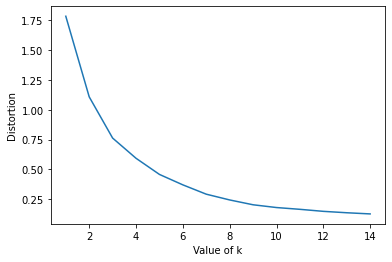

In [23]:
from sklearn.cluster import KMeans
X =  ret_var.values
sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1,15), sse)
plt.xlabel("Value of k")
plt.ylabel("Distortion")
plt.show()

In [24]:
stdOrder = ret_var.sort_values('Standard Deviation',ascending=False)
first_symbol = stdOrder.index[0]
ret_var.drop(first_symbol,inplace=True)
X = ret_var.values

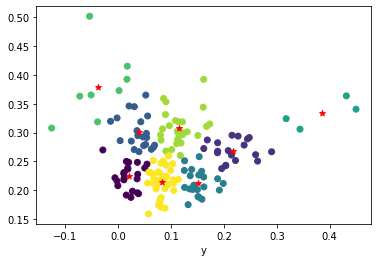

In [25]:
kmeans =KMeans(n_clusters = 8).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="viridis")
plt.xlabel("y")
plt.scatter(centroids[:,0], centroids[:,1],color="red",marker="*")
plt.show()

In [26]:
stocks = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']
x_df = pd.DataFrame(X, columns = ["Returns", "Volatitity"])
closerv = pd.concat([stockClusters,x_df],axis=1)
closerv = closerv.set_index("Symbol")
closerv

,Cluster,Returns,Volatitity
Symbol,,,
"(Adj Close, AARTIIND.NS)",1,0.195754,0.237328
"(Adj Close, ABFRL.NS)",6,0.110695,0.280676
"(Adj Close, ACC.NS)",7,0.068191,0.210302
"(Adj Close, ADANIENT.NS)",4,0.431574,0.363724
"(Adj Close, ADANIPORTS.NS)",6,0.117485,0.260179
...,...,...,...
"(Adj Close, UPL.NS)",6,0.101256,0.270355
"(Adj Close, VEDL.NS)",6,0.108249,0.320786
"(Adj Close, VOLTAS.NS)",7,0.113975,0.218537


To understand the k-means performance, we resort to the silhouette method, which examines the mean intracluster and the mean near-cluster distance for each sample. The value obtained is considered the silhouette score; it measures the separation. A silhouette score ranges from -1 to 1. Specifically, -1 shows poor model performance, and 1 shows optimal model performance. Listing 5-7 finds the score.

In [30]:
closerv[closerv['Cluster']==0]

,Cluster,Returns,Volatitity
Symbol,,,
"(Adj Close, AMARAJABAT.NS)",0,-0.002233,0.216053
"(Adj Close, BAJAJ-AUTO.NS)",0,0.038419,0.193735
"(Adj Close, BOSCHLTD.NS)",0,0.018255,0.236484
"(Adj Close, CADILAHC.NS)",0,0.036978,0.227494
"(Adj Close, COALINDIA.NS)",0,0.010780,0.217788
"(Adj Close, CUB.NS)",0,0.018146,0.238458
"(Adj Close, CUMMINSIND.NS)",0,0.050247,0.238321
"(Adj Close, EICHERMOT.NS)",0,0.036324,0.248222
"(Adj Close, EXIDEIND.NS)",0,-0.000610,0.207656
